# Jaguar_Cassification 

objective: the objective is to 
train a network to detect whether there is a jaguar or not 



the labels are two: 
jaguar or no-jaguar 

this notebook is based on the work 
https://github.com/MaxSob/ML_Notebooks/blob/main/Fashion%20MNIST%20in%20Keras.ipynb


The network structure is described below




In [ ]:
import tensorflow as tf
tf.__version__

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential                  # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import fashion_mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils     
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf

2023-04-14 05:58:12.827282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 05:58:12.978622: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 05:58:12.983803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/nvidia/lib:/usr

In [9]:
import imutils
import os
import cv2
import datetime
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer


## Sample data to balance the classes

In [68]:
import os
import random
import shutil

# Source folders
folder1 = '../test01/test/jaguar'
folder2 = '../test01/test/no-jaguar'

# Destination folders for sampled images
sampled_folder1 = '../test01/test/jaguar_sample'
sampled_folder2 = '../test01/test/no-jaguar_sample'

# Number of images to sample
num_images = 1400  

# List files in folder1 and folder2
files_folder1 = [file for file in os.listdir(folder1) if file.endswith('.jpg')]
files_folder2 = [file for file in os.listdir(folder2) if file.endswith('.jpg')]

# Randomly sample num_images from each folder
sampled_files_folder1 = random.sample(files_folder1, num_images)
sampled_files_folder2 = random.sample(files_folder2, num_images)

# Copy sampled files to the destination folders
for file in sampled_files_folder1:
    src = os.path.join(folder1, file)
    dst = os.path.join(sampled_folder1, file)
    shutil.copy(src, dst)

for file in sampled_files_folder2:
    src = os.path.join(folder2, file)
    dst = os.path.join(sampled_folder2, file)
    shutil.copy(src, dst)

print(f"Sampled {num_images} images from {folder1} to {sampled_folder1}")
print(f"Sampled {num_images} images from {folder2} to {sampled_folder2}")


Sampled 400 images from ../test01/test/jaguar to ../test01/test/jaguar_sample
Sampled 400 images from ../test01/test/no-jaguar to ../test01/test/no-jaguar_sample


## Train begin

In [89]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '../test01/train_sample/'
validation_data_dir = '../test01/val/'
test_data_dir = '../test01/test_sample/'
#values to train the netwrok 
nb_train_samples = 1400
nb_validation_samples = 330
#epochs = 20
batch_size = 16

In [90]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [91]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten,  BatchNormalization

model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(128))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.5))                              # 20% dropout of randomly selected nodes
model.add(Dense(1))                                 # final 10 FCN nodes
model.add(Activation('sigmoid'))    

In [92]:
INIT_LR = 1e-4
opt = Adam(INIT_LR)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy','Recall', 'Precision', 'FalsePositives', 'TruePositives', 'FalseNegatives'])

In [93]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [94]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [95]:
#loading the data 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    #color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2800 images belonging to 2 classes.


In [96]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    #color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1156 images belonging to 2 classes.


In [97]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    #color_mode="grayscale",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 800 images belonging to 2 classes.


In [98]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_30 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_31 (Bat  (None, 220, 220, 32)     128       
 chNormalization)                                                
                                                                 
 activation_37 (Activation)  (None, 220, 220, 32)     

In [101]:
epochs = 100
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  steps_per_epoch = 100)
  #callbacks = [DisplayCallback()]

Epoch 1/100
100/100 [==============================] - 68s 676ms/step - loss: 0.5449 - accuracy: 0.7456 - recall: 0.7790 - precision: 0.7267 - false_positives: 232.0000 - true_positives: 617.0000 - false_negatives: 175.0000 - val_loss: 0.5921 - val_accuracy: 0.7197 - val_recall: 0.4239 - val_precision: 0.5201 - val_false_positives: 131.0000 - val_true_positives: 142.0000 - val_false_negatives: 193.0000
Epoch 2/100
100/100 [==============================] - 67s 668ms/step - loss: 0.4859 - accuracy: 0.7869 - recall: 0.8335 - precision: 0.7575 - false_positives: 210.0000 - true_positives: 656.0000 - false_negatives: 131.0000 - val_loss: 0.5983 - val_accuracy: 0.7768 - val_recall: 0.6866 - val_precision: 0.6005 - val_false_positives: 153.0000 - val_true_positives: 230.0000 - val_false_negatives: 105.0000
Epoch 3/100
100/100 [==============================] - 67s 668ms/step - loss: 0.4055 - accuracy: 0.8219 - recall: 0.8631 - precision: 0.7937 - false_positives: 177.0000 - true_positives: 6

In [102]:
loss, accuracy, recall, precision, fp, tp, fn = model.evaluate(train_generator)
print('Test accuracy :', accuracy)
print('Test recall :', recall)
print('Test precision :', precision)
print('F1 :', (2*(precision*recall))/(precision + recall))

175/175 [==============================] - 46s 259ms/step - loss: 0.0564 - accuracy: 0.9768 - recall: 0.9800 - precision: 0.9737 - false_positives: 37.0000 - true_positives: 1372.0000 - false_negatives: 28.0000
Test accuracy : 0.9767857193946838
Test recall : 0.9800000190734863
Test precision : 0.9737402200698853
False Positive : 37.0
True Positive : 1372.0
False Negative : 28.0
True Negative : -1262.0
F1 : 0.9768600913492076


In [ ]:
# 224 x 224 Model - validation_generator
'''
73/73 [==============================] - 10s 141ms/step - loss: 0.3530 - accuracy: 0.9213 - recall: 0.9672 - precision: 0.8020 - false_positives: 80.0000 - true_positives: 324.0000 - false_negatives: 11.0000
Test accuracy : 0.9212802648544312
Test recall : 0.967164158821106
Test precision : 0.801980197429657
False Positive : 80.0
True Positive : 324.0
False Negative : 11.0
True Negative : -342.0
F1 : 0.8768606137737882
'''

In [ ]:
# 224 x 224 Model - train_generator
'''
175/175 [==============================] - 46s 259ms/step - loss: 0.0564 - accuracy: 0.9768 - recall: 0.9800 - precision: 0.9737 - false_positives: 37.0000 - true_positives: 1372.0000 - false_negatives: 28.0000
Test accuracy : 0.9767857193946838
Test recall : 0.9800000190734863
Test precision : 0.9737402200698853
False Positive : 37.0
True Positive : 1372.0
False Negative : 28.0
True Negative : -1262.0
F1 : 0.9768600913492076
'''

In [ ]:
# 224 x 224 Model - test_generator
'''
50/50 [==============================] - 9s 173ms/step - loss: 0.2405 - accuracy: 0.9337 - recall: 0.9525 - precision: 0.9181 - false_positives: 34.0000 - true_positives: 381.0000 - false_negatives: 19.0000
Test accuracy : 0.9337499737739563
Test recall : 0.9524999856948853
Test precision : 0.9180722832679749
False Positive : 34.0
True Positive : 381.0
False Negative : 19.0
True Negative : -384.0
F1 : 0.934969315207975
'''

In [ ]:
# 128 x 128 Model - validation_generator
'''
37/37 [==============================] - 6s 174ms/step - loss: 0.2950 - accuracy: 0.9048 - recall: 0.9433 - precision: 0.7764 - false_positives: 91.0000 - true_positives: 316.0000 - false_negatives: 19.0000
Test accuracy : 0.9048442840576172
Test recall : 0.9432835578918457
Test precision : 0.7764127850532532
False Positive : 91.0
True Positive : 316.0
False Negative : 19.0
True Negative : -389.0
F1 : 0.8517520168979397
'''

In [ ]:
# 128 x 128 Model - train_generator
'''
88/88 [==============================] - 27s 306ms/step - loss: 0.0193 - accuracy: 0.9950 - recall: 0.9957 - precision: 0.9943 - false_positives: 8.0000 - true_positives: 1394.0000 - false_negatives: 6.0000
Test accuracy : 0.9950000047683716
Test recall : 0.9957143068313599
Test precision : 0.9942938685417175
False Positive : 8.0
True Positive : 1394.0
False Negative : 6.0
True Negative : -1320.0
F1 : 0.9950035807426578
'''

In [ ]:
# 128 x 128 Model - test_generator
'''
25/25 [==============================] - 8s 286ms/step - loss: 0.2774 - accuracy: 0.9087 - recall: 0.9325 - precision: 0.8902 - false_positives: 46.0000 - true_positives: 373.0000 - false_negatives: 27.0000
Test accuracy : 0.9087499976158142
Test recall : 0.9325000047683716
Test precision : 0.8902148008346558
False Positive : 46.0
True Positive : 373.0
False Negative : 27.0
True Negative : -421.0
F1 : 0.9108669150778667
'''

In [49]:
model.save('../train_w_model01A/wHC_1_1.h5')

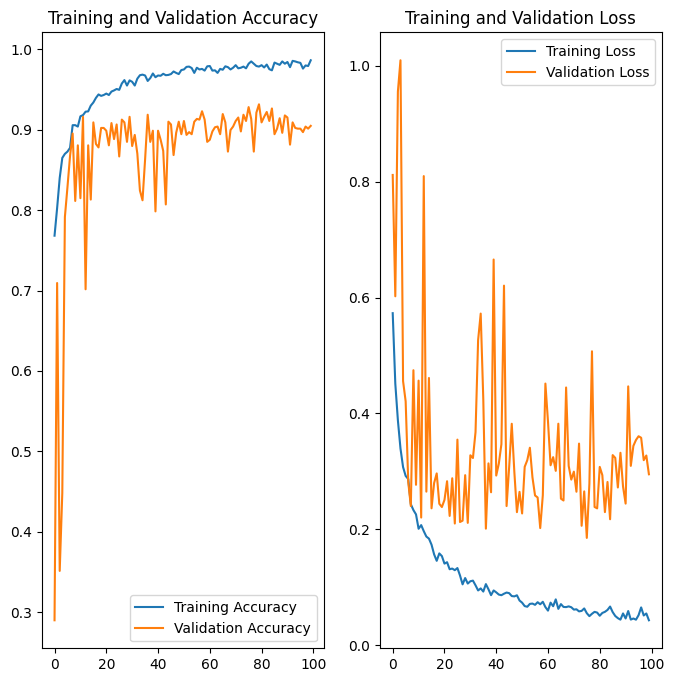

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
'''
from pathlib import Path
import imghdr

data_dir = "test01/val/jaguar"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
'''